**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [131]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [132]:
data = boston["data"]
data.shape

(506, 13)

In [133]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [134]:
X = pd.DataFrame(data, columns=feature_names) #признаки
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [135]:
target = boston["target"]

y = pd.DataFrame(target, columns=["price"]) #целевые значения
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [136]:
#размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
from sklearn.preprocessing import StandardScaler
#StandardScaler
scaler = StandardScaler(with_mean=False) #with_mean=False чтобы не проводить центрирование.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [138]:
from sklearn.manifold import TSNE

In [139]:
#Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42

In [140]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


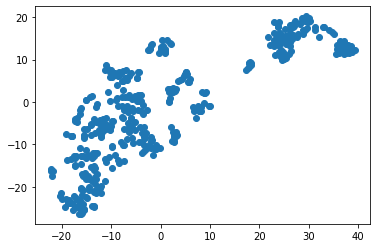

In [141]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [142]:
#по графику видно, что данные можно разбить на 2-3 кластера. 

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


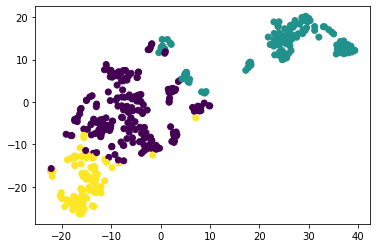

In [143]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [144]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными 
#цветами. Вычислите средние значения price и CRIM в разных кластерах.

In [145]:
labels_test = kmeans.predict(X_test_scaled)

In [146]:
y_train.mean()

price    22.796535
dtype: float64

In [147]:
y_train[labels_train == 0].mean()

price    24.958115
dtype: float64

In [148]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [149]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

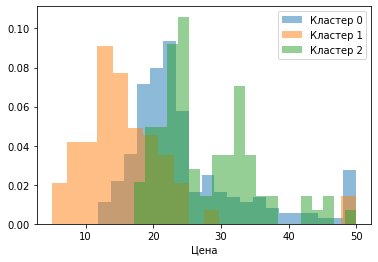

In [150]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

В кластер 1 попала самая дешевая недвижимость, в кластер 0 - близкая к среднему, в кластер 2 - самая дорогая.

In [151]:
X_train['CRIM'].mean()

3.609124628712873

In [152]:
X_train['CRIM'][labels_train == 0].mean()

0.42166020942408367

In [153]:
X_train['CRIM'][labels_train == 1].mean()

10.797028425196853

In [154]:
X_train['CRIM'][labels_train == 2].mean()

0.07356558139534886

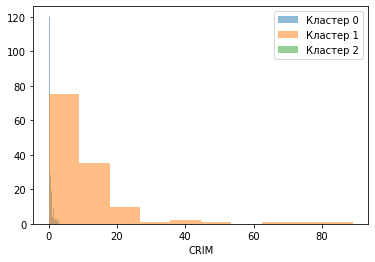

In [155]:
plt.hist(X_train['CRIM'][labels_train == 0], alpha=0.5)
plt.hist(X_train['CRIM'][labels_train == 1], alpha=0.5)
plt.hist(X_train['CRIM'][labels_train == 2], alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

В кластере 2 и 0 плотность признака расположена около 0, а в кластере 1 - распределена по разным значениям

In [156]:
#print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
#print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
#print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

**Задание 3**

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [157]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [158]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

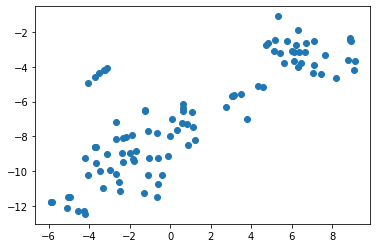

In [159]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

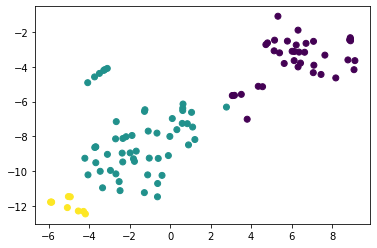

In [164]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_tests = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [165]:
print('Цена Кластер 0: {}'.format(y_test[labels_test == 0].mean().round(1)))
print('Цена Кластер 1: {}'.format(y_test[labels_test == 1].mean().round(1)))
print('Цена Кластер 2: {}'.format(y_test[labels_test == 2].mean().round(1)))

print('Криминал Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Криминал Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Криминал Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Цена Кластер 0: price    21.9
dtype: float64
Цена Кластер 1: price    16.4
dtype: float64
Цена Кластер 2: price    31.4
dtype: float64
Криминал Кластер 0: 0.26607882352941176
Криминал Кластер 1: 10.165531142857143
Криминал Кластер 2: 0.062060000000000004


в целом показатели средних на тестовой и тренировочной выборках схожи. Дополнительно посмотрим коэффцициенты r2

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#общий по модели
lr1 = LinearRegression()

lr1.fit(X_train_scaled, y_train)

y_test_pred = lr1.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [197]:
#в кластерах

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.7055462794669967

In [182]:
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.17449967022657298

In [183]:
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.8047521672172083